# A1 - Python

This assignment will cover some questions related to topics of data types, attribute types, exploratory data analysis, and data preprocessing. The assignment will also serve as a further introduction to using a high-level language for analysis (e.g., R, Python).

Make sure that you keep this notebook named as "a1.ipynb" 

Submit the zip-file created after running your notebook on the Linux lab machines. 

Your answers must be computer generated (including text and diagrams). Your final document submission should include text responses to questions and description of your efforts, tables, R/Python code used to calculate answers, and figures.

Any other packages or tools, outside those listed in the assignments or Canvas, should be cleared
by Dr. Brown before use in your submission.




## Q0 - Setup

The following code looks to see whether your notebook is run on Gradescope (GS), Colab (COLAB), or the linux Python environment you were asked to setup.

In [1]:
import re 
import os
import platform 
import sys 

# flag if notebook is running on Gradescope 
if re.search(r'amzn', platform.uname().release): 
    GS = True
else: 
    GS = False

# flag if notebook is running on Colaboratory 
try:
  import google.colab
  COLAB = True
except:
  COLAB = False

# flag if running on Linux lab machines. 
cname = platform.uname().node
if re.search(r'(guardian|colossus|c28)', cname):
    LLM = True 
else: 
    LLM = False

print("System: GS - %s, COLAB - %s, LLM - %s" % (GS, COLAB, LLM))

System: GS - False, COLAB - False, LLM - False


### Notebook Setup 

It is good practice to list all imports needed at the top of the notebook. You can import modules in later cells as needed, but listing them at the top clearly shows all which are needed to be available / installed.

If you are doing development on Colab, the otter-grader package is not available, so you will need to install it with pip (uncomment the cell directly below).

In [2]:
# Only uncomment if you developing on Colab 
# if COLAB == True: 
#     print("Installing otter:")
#     !pip install otter-grader==4.2.0 

In [3]:
# Import standard DS packages 
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline 

# Packages useful for Q4
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


# Package for Autograder 
import otter 
grader = otter.Notebook()

In [4]:
grader.check("q0")

q0 results:
    q0 - 1 result:
        ✅ Test case passed

    q0 - 2 result:
        ❌ Test case failed
        Trying:
            LLM == True | GS == True
        Expecting:
            True
        **********************************************************************
        Line 1, in q0 1
        Failed example:
            LLM == True | GS == True
        Expected:
            True
        Got:
            False

## Q1 - Census Data 

Consider the [Census Income data set](http://archive.ics.uci.edu/ml/datasets/Census+Income) available at the [UCI ML archive](http://archive.ics.uci.edu/ml/index.php). Specifically, you will be interested in the `adult.data` file which contains the data and `adult.names` files which contains documentation about the data.

You should explore the files a bit in a text editor to understand the format. Then load the data for you analysis, the first samples of the data set should be:

```
39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family,
        White, Male, 2174, 0, 40, United-States, <=50K
```

You attributes should be named: 
```
"age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
```

### Q1a - Load Data 

Load in the data directly from the UCI website into a Pandas Data Frame. 
Make sure to recognize any missing values when the data is read in. 

In [5]:
colnames = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
            "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
            "hours_per_week", "native_country", "income"]

missing_values = ['?', 'na', 'NA', 'NAN', '']

adult = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names = colnames, sep = ', ',
                   na_values = missing_values)  

adult.head()

C:\Users\pprad\AppData\Local\Temp\ipykernel_11076\2308060737.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names = colnames, sep = ', ',


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
grader.check("q1a")

q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q1b - Variable Definitions

For each variable (column of the data set) excluding the final class/target variable (last column), write a clear 1-sentence description of what the variable is, i.e., what information does it describe and how is it defined or collected.  Then, state the attribute type: *nominal*, *ordinal*, *interval*, or *ratio*. 

To answer this question, you may have to do a bit of reading and research into this data set. If you can not find a clear explanation of what a variable is and how it is defined say so.

For example, the variable `age` could be described as, “Age is the age of an individual as reported by that person for the 1990 census; the value is reported in integer units of years.”

Refer to each variables by the column name.

**YOUR ANSWERS**

* **age** - “Age is the age of an individual as reported by that person for the 1990 census; the value is reported in integer units of years.”  
*Ratio*
* **workclass**  - "Workclass is category of work industry an individual work for"
*Nominal*
* **fnlwgt** - "Fnlwgt is continious number series as an ID"
*Ratio*
* **education** - "Education is the highest level of education pursued by an individual"
*Ordinal*
* **education-num** - "Education-num is continious number associated with the highest level of education pursued by an individual"
*Interval*
* **marital-status** - "Marital-status is status of marital situation of an individual"
*Nominal*
* **occupation** - "Occupation is job role or profession of an individual"
*Nominal*
* **relationship** - "Relationship is connection or association an individual has or holds"
*Nominal*
* **race** - "Race is the groups that individual belongs to based on physical traits regarded as common among people of shared ancestry"
*Nominal*
* **sex** - "Sex is the gender of an individual"
*Nominal*
* **capital-gain** - "Capital-gain is profits gained from the sale of capital assets by an individual"
*Ratio*
* **capital-loss** - "Capital-loss is loss incurred from the sale of capital assets by an individual"
*Ratio*
* **hours-per-week** - "Hours-per-week is number of hours individual works per week"
*Ratio*
* **native-country** - "Native-country is the country of origin of an individual"
*Nominal*
* **income** - "Income is earing of an individual with respect to 50K interval"
*Internval*






<!-- END QUESTION -->

### Q1c - Missing Variables 

There are missing data.  
i. (2 points) What is the symbol or symbols used to indicate missing values?

'?' is the symbol used to indicate missing values


In [7]:
adult.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Missing values are encoded with 'NaN'

ii. (7 points) For each variable, calculate and report the percentage of missing data for that variable (percentage of rows).

In [8]:
print (adult.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [9]:
# Create a Data.Series that has the percentage of missing data for each 
#  attribute in the data set.
missing_values = ((adult.isnull().sum().values)/ len(adult)) * 100
miss_data = pd.Series(missing_values, index = adult.isnull().sum().index)

miss_data

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
income            0.000000
dtype: float64

In [10]:
grader.check("q1c")

q1c results: All test cases passed!

## Q2 - Data Preprocessing 

You are asked to write two functions `minmaxNorm` and `zscoreNorm` to perform normalization on passed in data. Do not just use preprocessing or normalization functions available in R or Python.

The function `minmaxNorm` should take four arguments
* `trData` - the training data (use to establish the data properties for normalization)
* `teData` - the testing data, (if supplied default: None), to also be normalized according the the same data properties
* `minV` - minimum value of new range (default: 0)
* `maxV` - maximum value of new range (default: 1)

The function `zscoreNorm` should take three arguments
* `trData` - the training data (use to establish the data properties for normalization)
* `teData` - the testing data, (if supplied default: None), to also be normalized according the the same data properties
* `madFlag` - boolean flag, if positive, use mean abs. deviation instead of standard deviation. (default: False)

For many of our tasks, the data is split into subsets (by sample) of training and testing data (see slides: 03.classify.part2). The training data is used to estimate the parameters needed in the transformation: for `zscoreNorm`, μ - mean and σ - standard deviation for each attribute; for `minmaxNorm`, min and max values for each attribute.

Both the training and testing data (if passed in) are to be transformed using the parameters from the training data and passed into the function. If the input is 2D a matrix/data frame/etc., then be sure to scale each feature (column) separately.

In R, the functions should work on vectors, matrices (1D and 2D) and data frames.

In Python, the functions should work on lists, np.arrays (1D and 2D), and data frames (see sample inputs below). 

The functions should return a tuple-Python of the transformed training data and transformed testing data.  In Python, each item of the tuple should be a numpy array.  If no test data is included as input return None for this item of the tuple. 

A few example test cases are supplied with more tested.

*Hint:* 
I suggest taking the input training/testing data and converting to the same type, e.g., numpy arrays.  Then, do the normalization calculations on this single type of data object.  


In [11]:
def minmaxNorm(trData, teData=None, minV=0, maxV=1):
    # Perform min-max normalization on trData and teData
    # return a tuple of the transformed data
    trData = np.array(trData)
    teData = np.array(teData)
    res1 = []
    res2 = []
    print(trData)
    res1 = ((((trData - np.min(trData, axis = 0)) / 
              (np.max(trData,axis = 0) - np.min(trData, axis = 0))) 
               * (maxV - minV)) + minV)

    if teData.ndim == 0:
        res2 = None 
    else:
        res2 = ((((teData - np.min(trData, axis = 0)) /
                  (np.max(trData,axis = 0) - np.min(trData, axis = 0))) 
                   * (maxV - minV)) + minV)
    
    return (res1,res2)


in1 = [0, 1, 2, 5]
out1 = minmaxNorm(in1, None)
print(out1)

in2 = np.array([0, 1, 2, 4, 8])
out2 = minmaxNorm(in2, None, -1, 1)
print(out2)


in3 = np.array([[1, 3, 4, 5], [2, 6, 5, 8], [3, 4, 6, 9]])
in3test = np.array([2.5, 5, 4, 7])
out3 = minmaxNorm(in3, in3test, -1, 1)
print(out3)


in4 = pd.DataFrame([[1, 3, 4, 5], [2, 6, 5, 8],
                    [3, 4, 6, 9]])
out4 = minmaxNorm(in4, in3test, 0, 10)
print(out4)

[0 1 2 5]
(array([0. , 0.2, 0.4, 1. ]), None)
[0 1 2 4 8]
(array([-1.  , -0.75, -0.5 ,  0.  ,  1.  ]), None)
[[1 3 4 5]
 [2 6 5 8]
 [3 4 6 9]]
(array([[-1.        , -1.        , -1.        , -1.        ],
       [ 0.        ,  1.        ,  0.        ,  0.5       ],
       [ 1.        , -0.33333333,  1.        ,  1.        ]]), array([ 0.5       ,  0.33333333, -1.        ,  0.        ]))
[[1 3 4 5]
 [2 6 5 8]
 [3 4 6 9]]
(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 5.        , 10.        ,  5.        ,  7.5       ],
       [10.        ,  3.33333333, 10.        , 10.        ]]), array([7.5       , 6.66666667, 0.        , 5.        ]))


In [12]:
out4[1][3]

5.0

In [13]:
def zscoreNorm(trData, teData=None, madFlag=0):
    # Perform Gaussian normalization on trData and teData
    # return a tuple of the transformed ;-9data
    trData = np.array(trData)
    teData = np.array(teData)
    res1 = []
    res2 = []
    
    if madFlag == 0:
        res1 = ((trData - np.mean(trData, axis = 0))/ np.std(trData, axis = 0))        
    else:
        res1 = ((trData - np.mean(trData, axis = 0))/ np.mean(np.abs(trData - np.mean(trData))))
           

    if teData.ndim == 0:
        res2 = None 
    else:
        if madFlag == 0:
            res2 = ((teData - np.mean(trData, axis = 0))/ np.std(trData, axis = 0))        
        else:
            res2 = ((teData - np.mean(trData, axis = 0))/ np.mean(np.abs(trData - np.mean(trData))))
    
    
    return (res1,res2)

In [14]:
in3 = np.array([[1, 3, 5, 4], [2, 6, 3, 8], [3, 10, 6, 9]])
out14 = zscoreNorm(in3, np.array([[1, 3, 4, 5],  [3, 2, 5, 6]]), madFlag=1)
out14

(array([[-0.42857143, -1.42857143,  0.14285714, -1.28571429],
        [ 0.        , -0.14285714, -0.71428571,  0.42857143],
        [ 0.42857143,  1.57142857,  0.57142857,  0.85714286]]),
 array([[-0.42857143, -1.42857143, -0.28571429, -0.85714286],
        [ 0.42857143, -1.85714286,  0.14285714, -0.42857143]]))

In [15]:
grader.check("q2")

q2 results:
    q2 - 1 result:
        ❌ Test case failed
        Trying:
            in1 = [0, 1, 2, 5]
        Expecting nothing
        ok
        Trying:
            out1 = minmaxNorm(in1, teData=None, minV=0, maxV=1)
        Expecting nothing
        **********************************************************************
        Line 2, in q2 0
        Failed example:
            out1 = minmaxNorm(in1, teData=None, minV=0, maxV=1)
        Expected nothing
        Got:
            [0 1 2 5]
        Trying:
            np.isclose(out1[0][0], 0.0) & np.isclose(out1[0][1], 0.2) & \
            np.isclose(out1[0][2], 0.4) & np.isclose(out1[0][3], 1.) & \
            (out1[1] == None)
        Expecting:
            True
        ok

    q2 - 2 result:
        ❌ Test case failed
        Trying:
            out2 = minmaxNorm(in1, teData=[2.5, -1, 3], minV=-1, maxV=1)
        Expecting nothing
        **********************************************************************
        Line 1, in q2 1
        Failed example:
            out2 = minmaxNorm(in1, teData=[2.5, -1, 3], minV=-1, maxV=1)
        Expected nothing
        Got:
            [0 1 2 5]
        Trying:
            np.isclose(out2[0][0], -1.0) & np.isclose(out2[0][1], -0.6) & \
            np.isclose(out2[0][2], -0.2) & np.isclose(out2[0][3], 1.) & \
            np.isclose(out2[1][0], 0.0) & np.isclose(out2[1][1], -1.4) & \
            np.isclose(out2[1][2], 0.2)
        Expecting:
            True
        ok

    q2 - 3 result:
        ✅ Test case passed

    q2 - 4 result:
        ✅ Test case passed

    q2 - 5 result:
        ❌ Test case failed
        Trying:
            in2 = np.array([0, 1, 2, 4, 8])
        Expecting nothing
        ok
        Trying:
            out5 = minmaxNorm(in2, None) 
        Expecting nothing
        **********************************************************************
        Line 2, in q2 4
        Failed example:
            out5 = minmaxNorm(in2, None) 
        Expected nothing
        Got:
            [0 1 2 4 8]
        Trying:
            np.allclose(out5[0], np.array([0., 0.125, 0.25, 0.5, 1.]))
        Expecting:
            True
        ok

    q2 - 6 result:
        ✅ Test case passed

    q2 - 7 result:
        ❌ Test case failed
        Trying:
            out7 = minmaxNorm(in2, np.array([-1, 3, 5, 9]), -1, 1)
        Expecting nothing
        **********************************************************************
        Line 1, in q2 6
        Failed example:
            out7 = minmaxNorm(in2, np.array([-1, 3, 5, 9]), -1, 1)
        Expected nothing
        Got:
            [0 1 2 4 8]
        Trying:
            np.allclose(out7[0], np.array([-1.  , -0.75, -0.5 ,  0.  ,  1.  ])) & \
            np.allclose(out7[1], np.array([-1.25, -0.25,  0.25,  1.25]))
        Expecting:
            True
        ok

    q2 - 8 result:
        ✅ Test case passed

    q2 - 9 result:
        ❌ Test case failed
        Trying:
            in3 = np.array([[1, 3, 5, 4], [2, 6, 3, 8], [3, 10, 6, 9]])
        Expecting nothing
        ok
        Trying:
            out9 = minmaxNorm(in3, None)
        Expecting nothing
        **********************************************************************
        Line 2, in q2 8
        Failed example:
            out9 = minmaxNorm(in3, None)
        Expected nothing
        Got:
            [[ 1  3  5  4]
             [ 2  6  3  8]
             [ 3 10  6  9]]
        Trying:
            np.allclose(out9[0], 
                        np.array([[0.        , 0.        , 0.66666667, 0.        ],
                                  [0.5       , 0.42857143, 0.        , 0.8       ],
                                  [1.        , 1.        , 1.        , 1.        ]]))
        Expecting:
            True
        ok

    q2 - 10 result:
        ✅ Test case passed

    q2 - 11 result:
        ✅ Test case passed

    q2 - 12 result:
        ✅ Test case passed

    q2 - 13 result:
        ❌ Test case failed
        Tryi

In [16]:
in3 = np.array([[1, 3, 5, 4], [2, 6, 3, 8], [3, 10, 6, 9]])
out14 = zscoreNorm(in3, np.array([[1, 3, 4, 5],  [3, 2, 5, 6]]), madFlag=1)
out14


(array([[-0.42857143, -1.42857143,  0.14285714, -1.28571429],
        [ 0.        , -0.14285714, -0.71428571,  0.42857143],
        [ 0.42857143,  1.57142857,  0.57142857,  0.85714286]]),
 array([[-0.42857143, -1.42857143, -0.28571429, -0.85714286],
        [ 0.42857143, -1.85714286,  0.14285714, -0.42857143]]))

## Q3 - Data Preprocessing

Let's now compare the normalization functions that you wrote above to using the normalization functions that are available in standard libraries: 

* Python: `MinMaxScaler` and `StandardScaler` or scale in `sklearn.preprocessing`
* R: `scale` and `preProcess`, `predict` from `caret`

In [17]:
# test data 
q3in = pd.DataFrame({'x': [20, 37, 40, 60, 85, 120], 'y': [-10, -8, 52, 3, 18, 23]})

q3outA = minmaxNorm(q3in, None)
print(q3outA)

q3outB = zscoreNorm(q3in, None)
print(q3outB)

# use MinMaxScaler with default range parameters
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(q3in)
q3outC = scaler.transform(q3in)
print(q3outC)

# use StandardScaler
scaler = preprocessing.StandardScaler().fit(q3in)
q3outD = scaler.transform(q3in)
print(q3outD) 


[[ 20 -10]
 [ 37  -8]
 [ 40  52]
 [ 60   3]
 [ 85  18]
 [120  23]]
(array([[0.        , 0.        ],
       [0.17      , 0.03225806],
       [0.2       , 1.        ],
       [0.4       , 0.20967742],
       [0.65      , 0.4516129 ],
       [1.        , 0.53225806]]), None)
(array([[-1.20221086, -1.08103207],
       [-0.69549389, -0.98702928],
       [-0.60607324,  1.83305438],
       [-0.00993563, -0.47001394],
       [ 0.7352364 ,  0.23500697],
       [ 1.77847723,  0.47001394]]), None)
[[0.         0.        ]
 [0.17       0.03225806]
 [0.2        1.        ]
 [0.4        0.20967742]
 [0.65       0.4516129 ]
 [1.         0.53225806]]
[[-1.20221086 -1.08103207]
 [-0.69549389 -0.98702928]
 [-0.60607324  1.83305438]
 [-0.00993563 -0.47001394]
 [ 0.7352364   0.23500697]
 [ 1.77847723  0.47001394]]


In [18]:
grader.check("q3")

q3 results: All test cases passed!

## Q4 - Data Distances 

Consider the following training data set of with 5 samples and 3 variables:

|  | A | B | C | 
|--|---|---|---|
| x1 | 1.4 | 1.3 | 2.9 |
| x2 | 1.8 | 1.1 | 3.2 | 
| x3 | 1.3 | 1.2 | 2.8 | 
| x4 | 0.8 | 3.3 | 3.1 | 
| x5 | 1.5 | 2.1 | 3.3 |

You have a new test data point x = (1.25, 1.74, 3.01).

### Distance functions 

Calculate and present the distance between the new data point and each of the points in the data set using:
* Manhattan distance, 
* Euclidean distance, 
* Minkowski distance (λ = 3), 
* supremum distance, and 
* cosine similarity (that is, 1 - cos value).

Present the results in a DataFrame, `dists`, with the rows for each data point and columns for each distance measure.

In [19]:

q4dat = np.array([[1.4, 1.3, 2.9], [1.8, 1.1, 3.2], [1.3, 1.2, 2.9],
                [0.9, 3.3, 3.1], [1.5, 2.1, 3.3]])
q4x = np.array([[1.25,1.74,3.01]])

dists = pd.DataFrame(index=range(0,5), columns=['L1', 'L2', 'L3', 'Linf', 'Cos'])
dists.index = ["x1", "x2", "x3", "x4", "x5"]

# Fill in values of dists Data Frame 
# Suggest using scipy's pdist and squareform function 
# try to avoid looping through the data and instead use matrix operations

dists = dists.append(pd.Series(q4x, index=["x1", "x2", "x3", "x4", "x5"]), ignore_index=True)

dists['L1'] = pdist(dists, 'cityblock')
      




dists['L1']

ValueError: Length of values (1) does not match length of index (5)

In [ ]:
np.reshape(q4x, (5,3), order='C')

In [ ]:
grader.check("q4")

## Q5 - Exploratory Data Analysis 

We will explore aspects of the census data from above. 


<!-- BEGIN QUESTION -->

### Q5a - Visualize: Amounts: Single Variable

Create a bar plot of `Education`. 

Use good visualization practices as discussed in class and in the [Visualization book reference](https://clauswilke.com/dataviz/). 
Make sure to label everything. 

In [ ]:
# Create bar plot of education
count = adult.groupby(['education']).size().reset_index(name='counts')

plt.barh(count['education'], count['counts'])
plt.ylabel("Highest education")
plt.xlabel("No. of individuals")
plt.title("Individuals with highest education pursued")
plt.show()




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q5b: Visualize: Amounts: Multiple Variables

Create a grouped bar plot of `Marital Status` with `sex`.


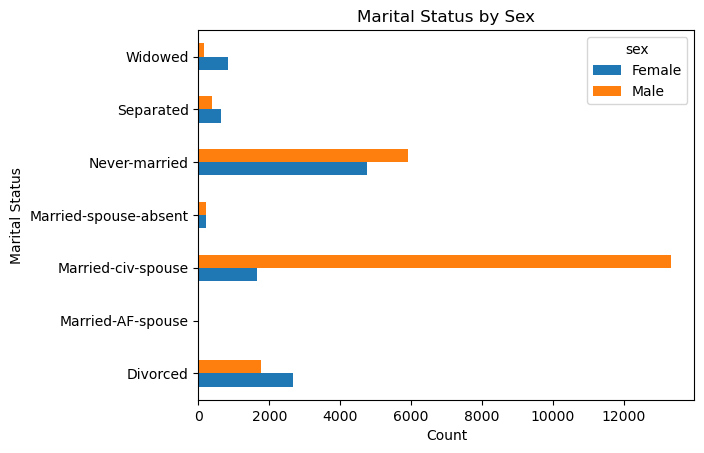

In [40]:
grouped = adult.groupby(['marital_status', 'sex'])['fnlwgt'].count().unstack()
grouped.plot(kind='barh', stacked=False)
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Marital Status by Sex')
plt.show()


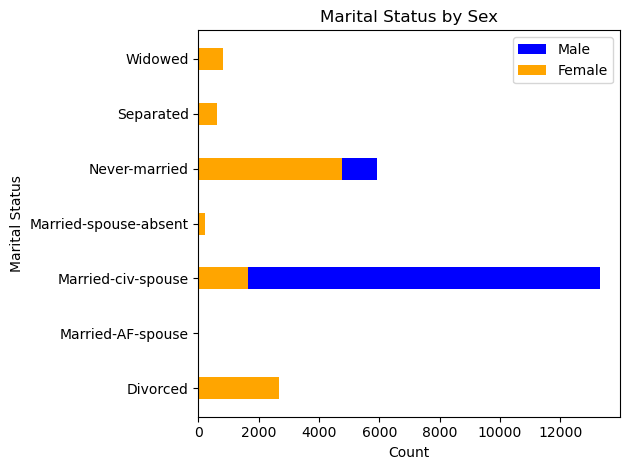

In [22]:
cnt = adult.groupby(['marital_status', 'sex']).size().reset_index(name='Count')
m_count = cnt[cnt['sex'] == 'Male']['Count']
f_count = cnt[cnt['sex'] == 'Female']['Count']

width = 0.4

b1 = plt.barh(cnt['marital_status'].unique(), m_count, width, color='blue', label='Male')
b2 = plt.barh(cnt['marital_status'].unique(), f_count, width, color='orange', label='Female')

plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Marital Status by Sex')
plt.legend()

plt.tight_layout()
plt.show()


In [92]:
cnt['marital_status'].unique()

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object)

In [79]:
data = {'Marital Status': ['Single', 'Married', 'Divorced', 'Widowed'],
        'Male': [25, 50, 15, 10],
        'Female': [30, 45, 20, 5]}
df = pd.DataFrame(data)

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = df['Marital Status']
male_count = df['Male']
female_count = df['Female']

rects1 = plt.bar(index, male_count, bar_width, alpha=opacity, color='b', label='Male')
rects2 = plt.bar(index, female_count, bar_width, alpha=opacity, color='g', label='Female', bottom=male_count)

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status by Sex')
plt.xticks(index, df['Marital Status'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
This will produce a grouped bar plot with the counts of each Marital Status by sex.






SyntaxError: invalid syntax (4061794833.py, line 2)

In [76]:
# Create plot

width = 0.40

count = adult.groupby(['marital_status', 'sex']).size().reset_index(name='counts')


b1 = plt.bar(adult['marital_status'], adult['Sex'], width)
b2 = plt.bar(adult['marital_status'], adult['Sex'], width)

# add labels and legend
plt.xlabel('Marital Status')
plt.ylabel('Count')

# show the plot
plt.show()



KeyError: 'Sex'

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q5c - Visualize: Distribution: Single Attribute

Generate a histogram with an appropriate number of bins to visualize the distribution of `age`.

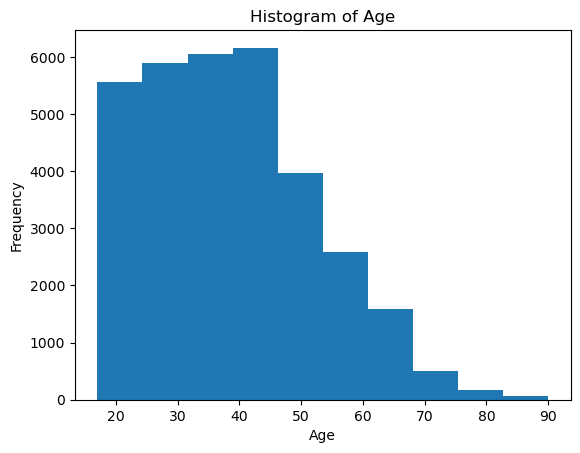

In [105]:
# Create plot

bins = 10
# create the histogram
plt.hist(adult['age'], bins=bins)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.show()



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q5d - Visualize: Distribution: Multiple Attributes

Create an overlapping density plot for `Age` by `Income`.

In [57]:
# Create plot




<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

**NOTE** the submission must be run on the campus linux machines.  See the instruction in the Canvas assignment.

In [58]:
# Save your notebook first, then run this cell to export your submission.
grader.export(filtering=False, run_tests=True)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 4123: character maps to <undefined>